<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# Backpropagation
By Richard Sowers
* <r-sowers@illinois.edu>
* <https://publish.illinois.edu/r-sowers/>

Copyright 2020 University of Illinois Board of Trustees. All Rights Reserved.

# imports and graphics configurations

In [ ]:
import os
import numpy
import pandas
import time
import random
import matplotlib
import itertools
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
#from pandas.plotting import autocorrelation_plot
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
import sklearn.linear_model
import sklearn.model_selection

def saver(fname):
    plt.savefig(fname+".png",bbox_inches="tight")

def legend(pos="bottom",ncol=3):
    if pos=="bottom":
        plt.legend(bbox_to_anchor=(0.5,-0.2), loc='upper center',facecolor="lightgray",ncol=ncol)
    elif pos=="side":
        plt.legend(bbox_to_anchor=(1.1,0.5), loc='center left',facecolor="lightgray",ncol=1)

In [ ]:
#for some reason, this needs to be in a separate cell
params={
    "font.size":15,
    "lines.linewidth":5
}
plt.rcParams.update(params)

In [ ]:
pngfiles=[f for f in os.listdir(".") if f.endswith(".png")]
print("existing png files: "+str(pngfiles))
print([os.remove(f) for f in pngfiles])

existing png files: ['deltas.png', 'forward.png', 'gradient.png', 'linearization_1.png', 'linearization_2.png', 'linearization_3.png']
[None, None, None, None, None, None]


## configuration variables

In [ ]:
SEED=0
markersize=5
thinlinewidth=2

# main

In [ ]:
def phi_1(x,gradient=False):
    out=numpy.cos(x)
    if gradient:
        out=-numpy.sin(x)
    return out

def phi_2(x,gradient=False):
    out=numpy.sin(x)
    if gradient:
        out=numpy.cos(x)
    return out

def phi_3(x,gradient=False):
    out=1/(1+x**2)
    if gradient:
        out=-2*x/(1+x**2)**2
    return out

def loss(x,gradient=False):
    out=x**4
    if gradient:
        out=4*x**3
    return out

class F:
    def __init__(self,x,philist,loss):
        self.x=x
        self.philist=list(philist)
        self.loss=loss

    def forward_prop(self,Mlist):
        Mlist=list(Mlist)
        assert len(Mlist)==len(self.philist)
        out=[]
        prior_phi_of_a=self.x
        for m,phi in zip(Mlist,self.philist):
            a=m*prior_phi_of_a
            out.append(a)
            prior_phi_of_a=phi(a)
        return out

    def evaluate(self,Mlist):
        Mlist=list(Mlist)
        a=self.forward_prop(Mlist)[-1]
        phi=self.philist[-1]
        return loss(phi(a))

    def compute_deltas(self,Mlist):
        Mlist=list(Mlist)
        assert len(M)==len(self.philist)
        alist=self.forward_prop(Mlist)
        out=[]
        (lasta,lastphi)=(alist[-1],self.philist[-1])
        next_delta_m=self.loss(lastphi(lasta),gradient=True)
        for a,m,phi in reversed(list(zip(alist,Mlist,self.philist))):
            delta=next_delta_m*phi(a,gradient=True)
            out.append(delta)
            next_delta_m=delta*m
        return list(reversed(out))

    def gradient(self,Mlist):
        Mlist=list(Mlist)
        assert len(M)==len(self.philist)
        alist=self.forward_prop(Mlist)
        deltas=self.compute_deltas(Mlist)
        prior_phi_of_a=self.x
        out=[]
        for a,delta,phi in zip(alist,deltas,self.philist):
            d=delta*prior_phi_of_a
            out.append(d)
            prior_phi_of_a=phi(a)
        return out


myF=F(4,[phi_1,phi_2,phi_3],loss)
M=[0.1,2,0.9]
print("forward propagation:",myF.forward_prop(M))
print("F: ",myF.evaluate(M))
print("backward propagation:",myF.compute_deltas(M))
print("gradient:",myF.gradient(M))

forward propagation: [0.4, 1.8421219880057702, 0.867074808685975]
F:  0.1061801524377793
backward propagation: [-0.07898393328123579, 0.10141270286985303, -0.4204368139575033]
gradient: [-0.31593573312494316, 0.09340728490982607, -0.40505574447415893]


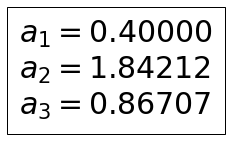

In [ ]:
alist=myF.forward_prop(M)
text=[]
for n,a in enumerate(alist):
    text.append(r"$a_{{{0:.0f}}}={1:.5f}$".format(n+1,a))
#text_str.append(r"$\sup|F_e-F_t|$={0:.2f}".format(maxval))
plt.figure(figsize=(1,1))
plt.gca().add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
plt.axis('off')
saver("forward")
plt.show()
plt.close()

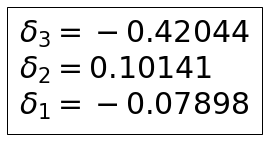

In [ ]:
deltalist=myF.compute_deltas(M)
text=[]
for n,delta in reversed(list(enumerate(deltalist))):
    text.append(r"$\delta_{{{0:.0f}}}={1:.5f}$".format(n+1,delta))
#text_str.append(r"$\sup|F_e-F_t|$={0:.2f}".format(maxval))
plt.figure(figsize=(1,1))
plt.gca().add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
plt.axis('off')
saver("deltas")
plt.show()
plt.close()

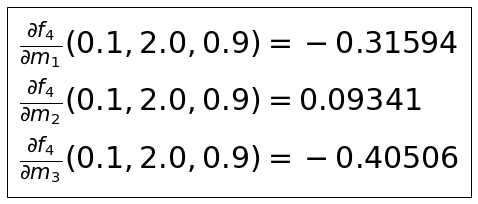

In [ ]:
gradlist=myF.gradient(M)
(M_1,M_2,M_3)=M
text=[]
for n,a in enumerate(gradlist):
    text.append(r"$\frac{{\partial f_4}}{{\partial m_{{{0:.0f}}}}}({2:.1f},{3:.1f},{4:.1f})={1:.5f}$".format(n+1,a,M_1,M_2,M_3))
#text_str.append(r"$\sup|F_e-F_t|$={0:.2f}".format(maxval))
plt.figure(figsize=(1,1))
plt.gca().add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
plt.axis('off')
saver("gradient")
plt.show()
plt.close()

In [ ]:
dm=0.1
M_range=[[M[0]],[M[1]],[M[2]]]
Fcenter=myF.evaluate(M)
print(Fcenter)

0.1061801524377793


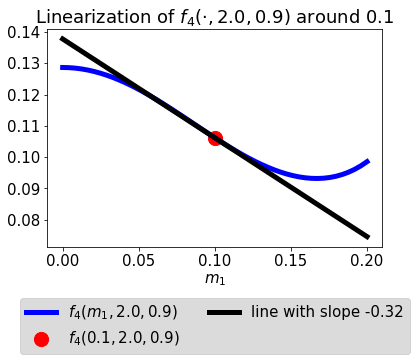

In [ ]:
n=0
(m_left,m_right)=(M[n]-dm,M[n]+dm)
grad=gradlist[n]
(f_left,f_right)=Fcenter+grad*(numpy.array([m_left,m_right])-M[n])
M_matrices=M_range.copy()
mrange=numpy.linspace(m_left,m_right)
M_matrices[n]=mrange
Fvals=[myF.evaluate(m) for m in itertools.product(*M_matrices)]
plt.figure()
plt.plot(mrange,Fvals,color="blue",label=r"$f_4(m_{{{0:.0f}}},{2:.1f},{3:.1f})$".format(n+1,M[0],M[1],M[2]))
plt.scatter(M[n],Fcenter,color="red",s=200,label=r"$f_4({0:.1f},{1:.1f},{2:.1f})$".format(M[0],M[1],M[2]))
plt.plot([m_left,m_right],[f_left,f_right],color="black",label="line with slope {0:.2f}".format(grad))
title=[]
title.append(r"Linearization of $f_4({0:s},{2:.1f},{3:.1f})$ around {1:.1f}".format("\cdot",M[0],M[1],M[2]))
plt.title("\n".join(title))
plt.xlabel(r"$m_{{{0:.0f}}}$".format(n+1))
legend("bottom",ncol=2)
saver("linearization_{0:.0f}".format(n+1))
plt.show()
plt.close()

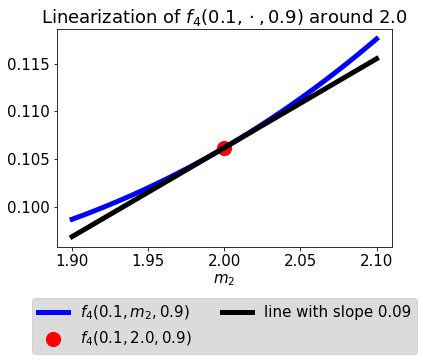

In [ ]:
n=1
(m_left,m_right)=(M[n]-dm,M[n]+dm)
grad=gradlist[n]
(f_left,f_right)=Fcenter+grad*(numpy.array([m_left,m_right])-M[n])
M_matrices=M_range.copy()
mrange=numpy.linspace(m_left,m_right)
M_matrices[n]=mrange
Fvals=[myF.evaluate(m) for m in itertools.product(*M_matrices)]
plt.figure()
plt.plot(mrange,Fvals,color="blue",label=r"$f_4({1:.1f},m_{{{0:.0f}}},{3:.1f})$".format(n+1,M[0],M[1],M[2]))
plt.scatter(M[n],Fcenter,color="red",s=200,label=r"$f_4({0:.1f},{1:.1f},{2:.1f})$".format(M[0],M[1],M[2]))
plt.plot([m_left,m_right],[f_left,f_right],color="black",label="line with slope {0:.2f}".format(grad))
title=[]
title.append(r"Linearization of $f_4({1:.1f},{0:s},{3:.1f})$ around {2:.1f}".format("\cdot",M[0],M[1],M[2]))
plt.title("\n".join(title))
plt.xlabel(r"$m_{{{0:.0f}}}$".format(n+1))
legend("bottom",ncol=2)
saver("linearization_{0:.0f}".format(n+1))
plt.show()
plt.close()

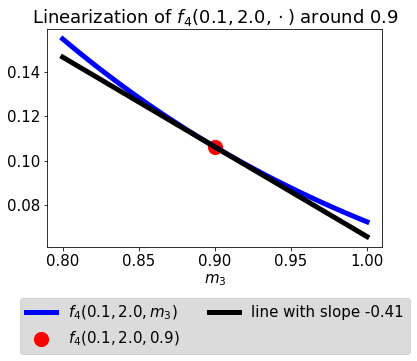

In [ ]:
n=2
(m_left,m_right)=(M[n]-dm,M[n]+dm)
grad=gradlist[n]
(f_left,f_right)=Fcenter+grad*(numpy.array([m_left,m_right])-M[n])
M_matrices=M_range.copy()
mrange=numpy.linspace(m_left,m_right)
M_matrices[n]=mrange
Fvals=[myF.evaluate(m) for m in itertools.product(*M_matrices)]
plt.figure()
plt.plot(mrange,Fvals,color="blue",label=r"$f_4({1:.1f},{2:.1f},m_{{{0:.0f}}})$".format(n+1,M[0],M[1],M[2]))
plt.scatter(M[n],Fcenter,color="red",s=200,label=r"$f_4({0:.1f},{1:.1f},{2:.1f})$".format(M[0],M[1],M[2]))
plt.plot([m_left,m_right],[f_left,f_right],color="black",label="line with slope {0:.2f}".format(grad))
title=[]
title.append(r"Linearization of $f_4({1:.1f},{2:.1f},{0:s})$ around {3:.1f}".format("\cdot",M[0],M[1],M[2]))
plt.title("\n".join(title))
plt.xlabel(r"$m_{{{0:.0f}}}$".format(n+1))
legend("bottom",ncol=2)
saver("linearization_{0:.0f}".format(n+1))
plt.show()
plt.close()